# Plot layer with maximum energy, overlaid at rechits, CLUE2D and CLUE3D levels

In [13]:
import sys
from dataclasses import dataclass
from enum import Enum, auto

import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)
import hist

sys.path.append("../..")
from HistogramLib.histogram import HistogramKind
from HistogramLib.store import HistogramStore
from hists.parameters import beamEnergies
from hists.store import HistogramId

In [14]:
hist_folder = '/grid_mnt/data_cms_upgrade/cuisset/testbeam18/clue3d/v28'
clueParams = "single-file"
#clueParams = "cmssw"
histStore = HistogramStore(hist_folder, HistogramId)

In [15]:
class Level(Enum):
    RECHITS = auto()
    CLUSTER_2D = auto()
    CLUSTER_3D = auto()

@dataclass
class PlotInfo:
    beamEnergy:int
    datatype:str

In [16]:
def getHist(info:PlotInfo, level:Level):
    projections = {
        "beamEnergy": hist.loc(info.beamEnergy),
    }
    if level is Level.RECHITS:
        h_name = "RechitsLayerWithMaximumEnergy"
        layerAxisName = "rechits_layer"
    elif level is Level.CLUSTER_2D:
        h_name = "LayerWithMaximumClustered2DEnergy"
        layerAxisName = "clus2D_layer"
    elif level is Level.CLUSTER_3D:
        h_name = "Clus3DLayerWithMaximumClusteredEnergy"
        layerAxisName = "layer_with_max_clustered_energy"
        projections["mainOrAllTracksters"] = hist.loc("mainTrackster")
    else:
        assert(False)
    return (histStore
        .get(HistogramId(h_name, clueParams, info.datatype))
        .getHistogram(HistogramKind.COUNT)[projections]
        .project(layerAxisName)
    )

In [17]:
getHist(PlotInfo(datatype="data", beamEnergy=20), level=Level.CLUSTER_3D)

Hist(Integer(0, 30, name='layer_with_max_clustered_energy', label='Layer number'), storage=Double()) # Sum: 2007.0

In [18]:
def makePlot(h_rechits, h_2D, h_3D, plotInfo:PlotInfo):
    plt.figure()
    plt.xlabel("Layer")
    plt.ylabel("Event count")
    
    hep.histplot([h_rechits, h_2D, h_3D], yerr=False, label=["Rechits", "Layer cluster", "CLUE3D trackster\n(main trackster only)"])

    plt.xlim(1, 16)
    if plotInfo.datatype == "data":
        hep.cms.text("Preliminary")
    else:
        hep.cms.text("Simulation Preliminary")
    hep.cms.lumitext("$e^+$ " + str(plotInfo.beamEnergy) + " GeV")
    plt.legend()

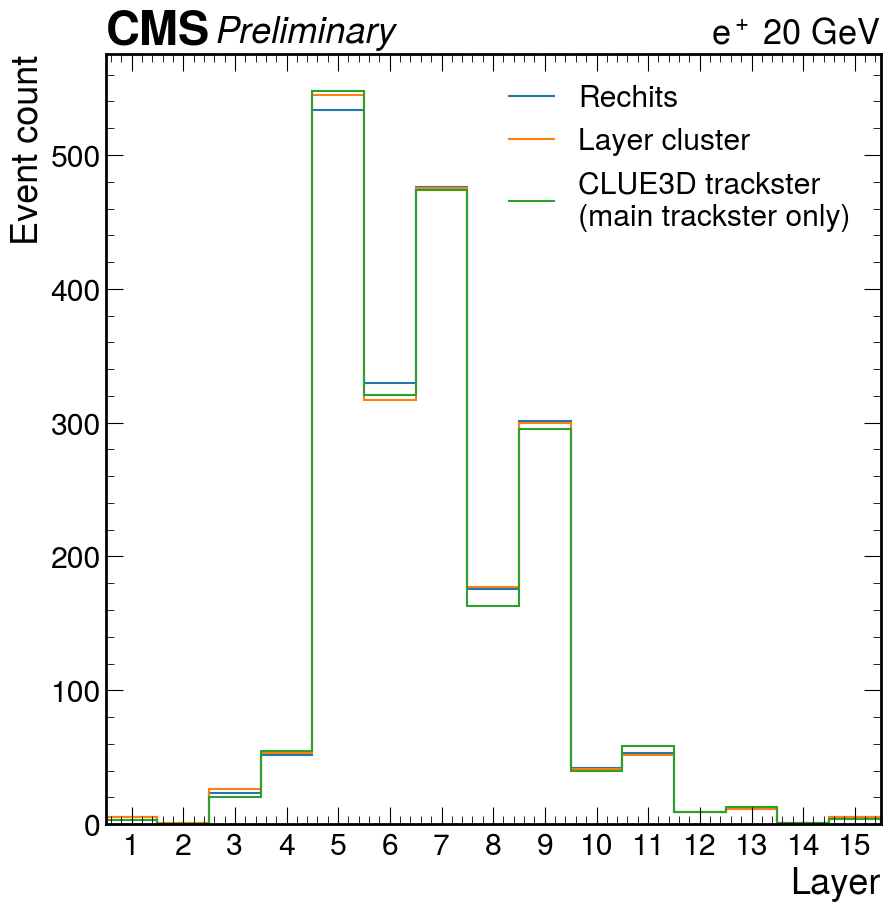

In [19]:
plotInfo = PlotInfo(datatype="data", beamEnergy=20)
makePlot(*(getHist(plotInfo, level) for level in Level), plotInfo=plotInfo)